<a href="https://colab.research.google.com/github/kavanabhandari/MOVIE-RECOMMENDATION-SYSTEM/blob/master/MOVIE_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finding the similarity

Suppose, you are given the following two texts:

Text A: London Paris London

Text B: Paris Paris London

How would you find the similarity between Text A and Text B?

Let’s analyze these texts….

Text A: Contains the word “London” 2 times and the word “Paris” 1 time. 

Text B: Contains the word “London” 1 time and the word “Paris” 2 times.

At first, we need to have text A and B in our program:

In [75]:
text = ["London Paris London","Paris Paris London"]

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)


In [77]:
print(cv.get_feature_names())
print(count_matrix.toarray())

['london', 'paris']
[[2 1]
 [1 2]]


In [78]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(count_matrix)
print(similarity_scores)

[[1.  0.8]
 [0.8 1. ]]


We can interpret this output like this-
Text A:     Text B: Text A: [[1.         0.8]   Text B: [0.8         1.]]

Now we know how to find similarity between contents. So, let’s try to apply this knowledge to build a content based movie recommendation engine.

#Building the recommendation engine

In [79]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("movie_dataset.csv")

In [80]:
features = ['keywords','cast','genres','director']

In [81]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [82]:
for feature in features:
    df[feature] = df[feature].fillna('') #filling all NaNs with blank string

df["combined_features"] = df.apply(combine_features,axis=1) #applying combined_features() method over each rows of dataframe and storing the combined string in "combined_features" column

In [83]:
df.iloc[0].combined_features

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

In [84]:
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer() object

In [85]:
cosine_sim = cosine_similarity(count_matrix)

In [86]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [87]:
movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

In [88]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]


In [89]:
i=0
print("Top 5 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break


Top 5 similar movies to Avatar are:

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien


#cosine_similarity

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
text = ["London Paris London","Paris Paris London"]

In [92]:
cv = CountVectorizer()

In [93]:
count_matrix = cv.fit_transform(text)

In [94]:
#print count_matrix.toarray()
similarity_scores = cosine_similarity(count_matrix)

In [95]:
print (similarity_scores)

[[1.  0.8]
 [0.8 1. ]]


#movie_recommender_starter

In [96]:
import pandas as pd
import numpy as np

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
def get_title_from_index(index):
	return df[df.index == index]["title"].values[0]

def get_index_from_title(title):
	return df[df.title == title]["index"].values[0]

In [99]:
##Step 1: Read CSV File

##Step 2: Select Features

##Step 3: Create a column in DF which combines all selected features

##Step 4: Create count matrix from this new combined column

##Step 5: Compute the Cosine Similarity based on the count_matrix

movie_user_likes = "Avatar"

## Step 6: Get index of this movie from its title

## Step 7: Get a list of similar movies in descending order of similarity score


## Step 8: Print titles of first 50 movies

#movie_recommender_completed

In [100]:
##Step 1: Read CSV File
df = pd.read_csv("movie_dataset.csv")
print (df.columns)

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')


In [101]:
##Step 2: Select Features
features = ['keywords','cast','genres','director']

In [102]:
##Step 3: Create a column in DF which combines all selected features
for feature in features:
	df[feature] = df[feature].fillna('')

def combine_features(row):
	try:
		return row['keywords'] +" "+row['cast']+" "+row["genres"]+" "+row["director"]
	except:
		print ("Error:"), row	

df["combined_features"] = df.apply(combine_features,axis=1)
print ("Combined Features:", df["combined_features"].head())

Combined Features: 0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combined_features, dtype: object


In [103]:
##Step 4: Create count matrix from this new combined column
cv = CountVectorizer()

count_matrix = cv.fit_transform(df["combined_features"])

In [104]:
##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix) 
movie_user_likes = "Avatar"

In [105]:
## Step 6: Get index of this movie from its title
movie_index = get_index_from_title(movie_user_likes)

similar_movies =  list(enumerate(cosine_sim[movie_index]))

In [106]:
## Step 7: Get a list of similar movies in descending order of similarity score
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)

In [107]:
## Step 8: Print titles of first 50 movies
i=0
for element in sorted_similar_movies:
		print (get_title_from_index(element[0]))
		i=i+1
		if i>50:
			break

Avatar
Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
Lockout
Jason X
The Helix... Loaded
Moonraker
Planet of the Apes
Galaxy Quest
Gravity
Alien³
Jupiter Ascending
The Wolverine
Silent Running
Zathura: A Space Adventure
Trekkies
Cargo
Wing Commander
Star Trek
Lost in Space
Babylon A.D.
The Fifth Element
Oblivion
Titan A.E.
AVP: Alien vs. Predator
The Empire Strikes Back
Dragonball Evolution
Superman Returns
Divergent
John Carter
The Black Hole
The Ice Pirates
Memoirs of an Invisible Man
Starship Troopers
The Astronaut's Wife
Machete Kills
Soldier
The Abyss
Damnation Alley
Men in Black
Space Cowboys
Space Dogs
The Time Machine
Sheena
Captain America: Civil War
Star Trek: Insurrection
Oz: The Great and Powerful


Let's Inspect the vote_average feature and check if there are any null values. Looks like it is clean.

In [108]:
df["vote_average"].unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

Now, we will again sort our sorted_similar_movies but this time with respect to vote_average. x[0] has the index of the movie in the data frame.

In [109]:
sort_by_average_vote = sorted(sorted_similar_movies,key=lambda x:df["vote_average"][x[0]],reverse=True)
print(sort_by_average_vote)


[(3519, 0.0), (4045, 0.0), (4247, 0.0), (4662, 0.0), (3992, 0.0), (2386, 0.08399210511316162), (1881, 0.0), (2970, 0.0), (2796, 0.03928371006591931), (3337, 0.036369648372665396), (2294, 0.08025723539051281), (1818, 0.07698003589195011), (662, 0.0), (2731, 0.0), (3232, 0.0), (3865, 0.0), (4755, 0.0), (1990, 0.23570226039551587), (1987, 0.08399210511316162), (2247, 0.08206099398622181), (690, 0.07548513560963972), (4535, 0.04303314829119352), (2947, 0.041030496993110906), (1663, 0.040128617695256406), (65, 0.03774256780481986), (809, 0.0), (1847, 0.0), (2170, 0.0), (3057, 0.0), (3719, 0.0), (3723, 0.0), (4602, 0.0), (2912, 0.16412198797244362), (96, 0.15097027121927944), (329, 0.11785113019775793), (95, 0.11111111111111113), (3573, 0.04199605255658081), (3454, 0.040128617695256406), (1553, 0.0), (2091, 0.0), (2284, 0.0), (2453, 0.0), (2760, 0.0), (3041, 0.0), (3622, 0.0), (3788, 0.0), (3866, 0.0), (3906, 0.0), (4238, 0.0), (4302, 0.0), (3208, 0.3464101615137755), (262, 0.123091490979332

In [110]:
i=0
print("Suggesting top 5 movies in order of Average Votes:\n")
for element in sort_by_average_vote:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break

Suggesting top 5 movies in order of Average Votes:

Stiff Upper Lips
Dancer, Texas Pop. 81
Me You and Five Bucks
Little Big Top
Sardaarji
One Man's Hero


After seeing the output, I went one step further to compare it to other recommendation engines.

So, I searched Google for similar movies to “Avatar” and here is what I got-

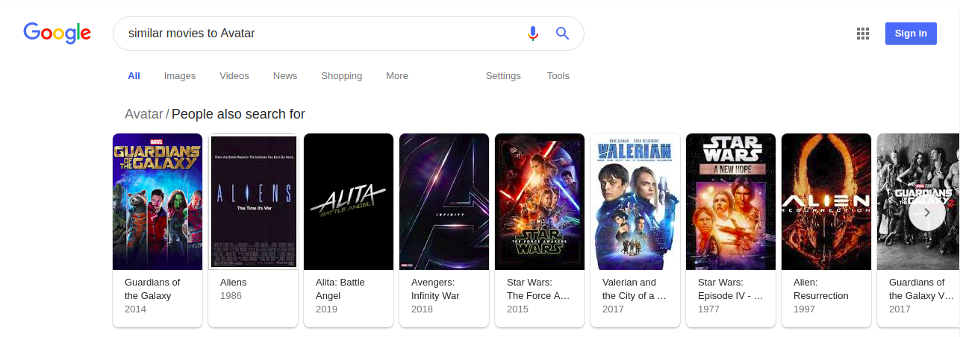